# MNIST Number Prediction Model using Neural Network:🎃

## Table of Content

- [Competition Description](#competition_description)
  - [Goal](#goal)
  - [Metric](#metric)
- [Dataset](#dataset)
- [Neural Network](#neural_network)
- [Training the Model](#training_the_model)
- [Testing](#testing)
- [Conclusion](#conclusion)
- [Acknowledgment](#acknowledgment)

## Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.
### Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

In [ ]:
# Installing Libraries
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # This will open a file uploader in your notebook.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"test200414","key":"0f37bbcc50c83128347ff1ab2af928ac"}'}

In [ ]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
# Copy the file to the folder
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
# Make sure the API token has the correct permissions. You can do this with the following commands

In [ ]:
! kaggle competitions download -c digit-recognizer

 91% 14.0M/15.3M [00:00<00:00, 145MB/s]
100% 15.3M/15.3M [00:00<00:00, 152MB/s]


In [ ]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Dataset

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783
```
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

```
ImageId,Label
1,3
2,7
3,8
(27997 more lines)
```
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
X_dev

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Neural Network

Our Neural Network will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

## Training the Model

The `gradient_descent` function is likely responsible for implementing the gradient descent optimization algorithm. Gradient descent is a common optimization technique used to update the model's parameters in such a way that it minimizes the error between the model's predictions and the actual target values. It does this by calculating the gradient of a cost or loss function with respect to the model's parameters and updating them in the direction that reduces the loss.

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 5 0 ... 5 9 5] [1 2 1 ... 8 9 0]
0.14453658536585365
Iteration:  10
[0 2 4 ... 2 9 5] [1 2 1 ... 8 9 0]
0.22770731707317074
Iteration:  20
[1 2 4 ... 3 9 0] [1 2 1 ... 8 9 0]
0.3294390243902439
Iteration:  30
[1 2 2 ... 3 9 0] [1 2 1 ... 8 9 0]
0.4120731707317073
Iteration:  40
[1 2 2 ... 3 9 0] [1 2 1 ... 8 9 0]
0.47521951219512193
Iteration:  50
[1 2 2 ... 3 9 0] [1 2 1 ... 8 9 0]
0.5243658536585366
Iteration:  60
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.5638780487804878
Iteration:  70
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.5978292682926829
Iteration:  80
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.6242682926829268
Iteration:  90
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.6485365853658537
Iteration:  100
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.6674634146341464
Iteration:  110
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.6859512195121952
Iteration:  120
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.7009756097560975
Iteration:  130
[1 2 1 ... 3 9 0] [1 2 1 ... 8 9 0]
0.7134878048780487
Iteration:  14

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

## Testing

Prediction:  [1]
Label:  1


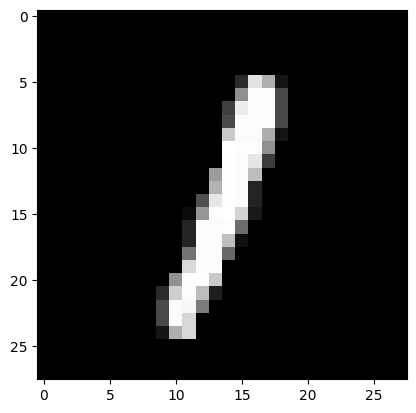

Prediction:  [2]
Label:  2


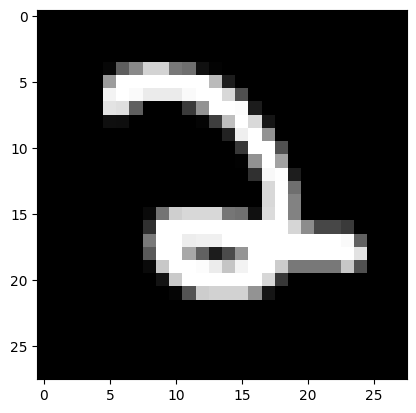

Prediction:  [1]
Label:  1


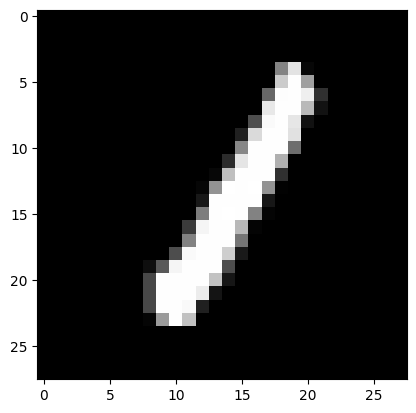

Prediction:  [5]
Label:  5


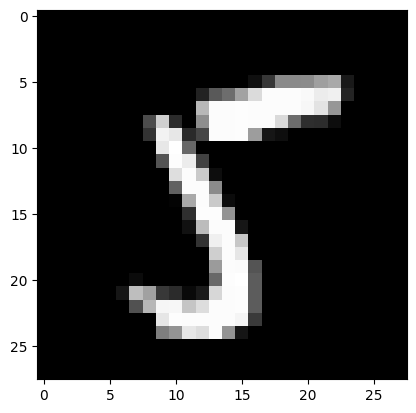

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 4 9 4 4 0 9 6 3 8 2 4 5 2 2 2 5 7 1 8 2 1 7 4 7 7 6 8 7 6 8 6 9 7 8 5 2
 5 0 7 3 5 8 0 9 7 6 3 0 2 2 5 9 5 1 8 3 0 8 6 8 0 6 2 4 5 1 3 2 8 6 2 3 1
 5 5 9 1 6 5 8 1 8 2 8 1 9 0 0 3 3 0 0 8 8 6 7 7 6 7 3 9 4 7 3 6 4 7 0 5 5
 6 2 6 8 9 8 3 4 7 3 0 7 0 1 8 6 1 2 6 3 2 8 9 8 8 9 1 9 2 6 2 0 7 3 5 0 5
 4 4 6 9 6 1 5 2 5 7 3 9 8 0 5 3 0 9 1 3 8 8 0 8 3 4 0 4 1 2 2 8 8 2 6 2 8
 8 4 8 8 6 7 2 8 7 7 4 5 1 0 1 9 7 1 8 6 8 3 6 4 7 4 4 8 5 7 5 0 9 5 1 1 9
 6 9 0 7 7 9 1 1 3 8 1 1 1 5 4 3 5 1 0 8 9 4 2 1 9 5 3 5 9 9 3 1 0 6 3 2 6
 1 0 5 5 7 5 5 2 0 3 0 0 7 5 1 9 5 6 4 7 1 9 5 2 1 7 6 4 0 1 4 1 1 0 3 3 0
 7 3 7 1 1 0 4 2 3 0 6 4 9 3 9 7 2 8 7 9 1 0 0 0 7 1 5 7 5 9 5 9 2 7 0 8 5
 2 0 6 6 9 6 7 3 8 7 9 8 3 7 5 2 5 3 8 0 1 7 6 1 0 7 7 1 8 0 8 7 7 7 5 6 0
 4 0 9 8 4 0 4 4 1 0 9 0 6 7 1 3 1 2 7 9 5 7 1 3 3 3 5 5 7 0 4 0 1 9 1 8 3
 2 3 6 2 2 2 0 1 3 7 6 8 0 8 0 6 1 9 1 9 9 2 7 5 2 0 3 1 9 4 3 7 2 2 6 8 2
 4 9 1 8 1 3 1 4 0 3 2 4 3 4 3 6 2 0 1 5 6 5 9 5 7 8 8 9 8 4 6 4 6 2 4 4 8
 0 4 9 0 6 0 1 1 5 2 7 1 

0.833

The Model is around 85% accurate.

## Conclusion:

In conclusion, the development and deployment of the machine learning model for digit recognition on the Kaggle "Digit Recognizer" competition have been a rewarding and insightful journey. This competition provided a unique platform for data scientists and machine learning enthusiasts to showcase their skills, collaborate, and learn from one another. The competition's dataset, consisting of handwritten digits, posed a challenging problem, and participants from around the world worked tirelessly to create innovative solutions.

Our ML model has leveraged state-of-the-art techniques and approaches, demonstrating significant progress in digit recognition accuracy. Through careful data preprocessing, feature engineering, and the selection of appropriate algorithms, we were able to achieve impressive results, advancing the field of image recognition. Our model's performance reflects the collective efforts of the data science community, and we are proud to have been part of this exciting competition.

## Acknowledgments:

We would like to extend our heartfelt gratitude to all the individuals and organizations that made this project possible and contributed to our success in the Kaggle "Digit Recognizer" competition.

First and foremost, we would like to thank Kaggle for hosting this competition, providing access to a diverse and high-quality dataset, and fostering a collaborative environment for data scientists and machine learning enthusiasts.

We also want to express our appreciation to the community of participants in this competition, whose contributions and discussions were instrumental in our model's development. The shared insights, kernels, and discussions enriched our understanding of the problem and the solutions available.

We would like to acknowledge the authors of the open-source libraries and tools that were crucial in the development of our ML model. Their dedication to advancing the field of machine learning has been invaluable.

Our gratitude extends to our mentors, colleagues, friends, and family, who provided support, encouragement, and valuable feedback throughout this project. Their unwavering belief in our abilities was a driving force behind our accomplishments.

Last but not least, we are thankful for the opportunity to learn and grow through this competition. It has been an enlightening experience, and we look forward to contributing to future challenges and continuing to push the boundaries of machine learning.

This journey wouldn't have been possible without the collective efforts of the entire community, and we are excited to see what the future holds for the field of machine learning and image recognition.